In [1]:
import pandas as pd
import time 
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv('genre.csv')
li=['pop','country','metal','rock','classical']
df.drop('Unnamed: 0',axis=1,inplace=True)
df = df.sample(frac=1).reset_index(drop=True)
df=df.loc[df['genre'].isin(li)]
df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,mode,genre
0,"Nulla in mundo pax, R.630: 1. Nulla in mundo p...",Baroque Adagios,Various Artists,2002-01-01,1.68,40,0.8080,0.302,0.1830,0.019800,0.1700,-14.139,0.0440,0.1110,99.064,4,1,classical
1,Behind Blue Eyes - Original Album Version,Greatest Hits,The Who,2009-12-21,2.23,0,0.2290,0.399,0.5180,0.001220,0.2620,-10.637,0.0318,0.2850,127.084,4,1,rock
2,When Doves Cry,Purple Rain,Prince,1984-06-25,3.53,71,0.0102,0.729,0.9890,0.000044,0.4430,-4.613,0.0490,0.8400,126.470,4,0,rock
4,"Valse in A Minor, Op. posth. B. 150 (Version f...","Chopin: Valse in A Minor, Op. posth. B. 150 (V...",Frédéric Chopin,2021-05-07,1.43,42,0.9820,0.391,0.0939,0.933000,0.1070,-25.725,0.0531,0.1010,127.162,4,0,classical
5,Unwell - 2007 Remaster,Exile on Mainstream,Matchbox Twenty,2007-10-02,2.37,63,0.0456,0.442,0.7930,0.000000,0.3280,-5.152,0.0347,0.4370,80.985,4,1,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,Bad At Love,hopeless fountain kingdom (Deluxe),Halsey,2017-06-02,1.81,74,0.0604,0.675,0.7510,0.000000,0.0893,-3.539,0.0296,0.6120,118.384,4,1,pop
932,Body Like A Back Road,Body Like A Back Road,Sam Hunt,2017-02-01,1.65,75,0.4470,0.732,0.4580,0.000000,0.1360,-7.225,0.0311,0.6610,98.938,4,1,country
935,Hurricane,This One's for You,Luke Combs,2017-06-02,2.23,75,0.0153,0.464,0.8130,0.000000,0.2540,-6.185,0.0416,0.5150,75.977,4,1,country
937,Hello Walls,The Ultimate Box Collection,Faron Young,2015-10-09,1.34,44,0.3850,0.674,0.2740,0.002070,0.0763,-15.150,0.0307,0.8060,108.118,4,1,country


In [3]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['label']=label_encoder.fit_transform(df.genre)
df.tail()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,mode,genre,label
931,Bad At Love,hopeless fountain kingdom (Deluxe),Halsey,2017-06-02,1.81,74,0.0604,0.675,0.751,0.00000,0.0893,-3.539,0.0296,0.6120,118.384,4,1,pop,3
932,Body Like A Back Road,Body Like A Back Road,Sam Hunt,2017-02-01,1.65,75,0.4470,0.732,0.458,0.00000,0.1360,-7.225,0.0311,0.6610,98.938,4,1,country,1
935,Hurricane,This One's for You,Luke Combs,2017-06-02,2.23,75,0.0153,0.464,0.813,0.00000,0.2540,-6.185,0.0416,0.5150,75.977,4,1,country,1
937,Hello Walls,The Ultimate Box Collection,Faron Young,2015-10-09,1.34,44,0.3850,0.674,0.274,0.00207,0.0763,-15.150,0.0307,0.8060,108.118,4,1,country,1
938,you broke me first,you broke me first,Tate McRae,2020-04-17,1.69,87,0.7850,0.667,0.373,0.00000,0.0906,-9.389,0.0500,0.0823,124.148,4,1,pop,3


In [4]:
X=df[['acousticness','danceability','energy','instrumentalness','loudness','speechiness','valence','tempo']].values

In [5]:
y=df['genre']

In [6]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.1, random_state=1)

In [7]:
genreTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
genreTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [8]:
genreTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [9]:
predTree=genreTree.predict(X_testset)

In [10]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.5217391304347826


In [11]:
from six import StringIO
#from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

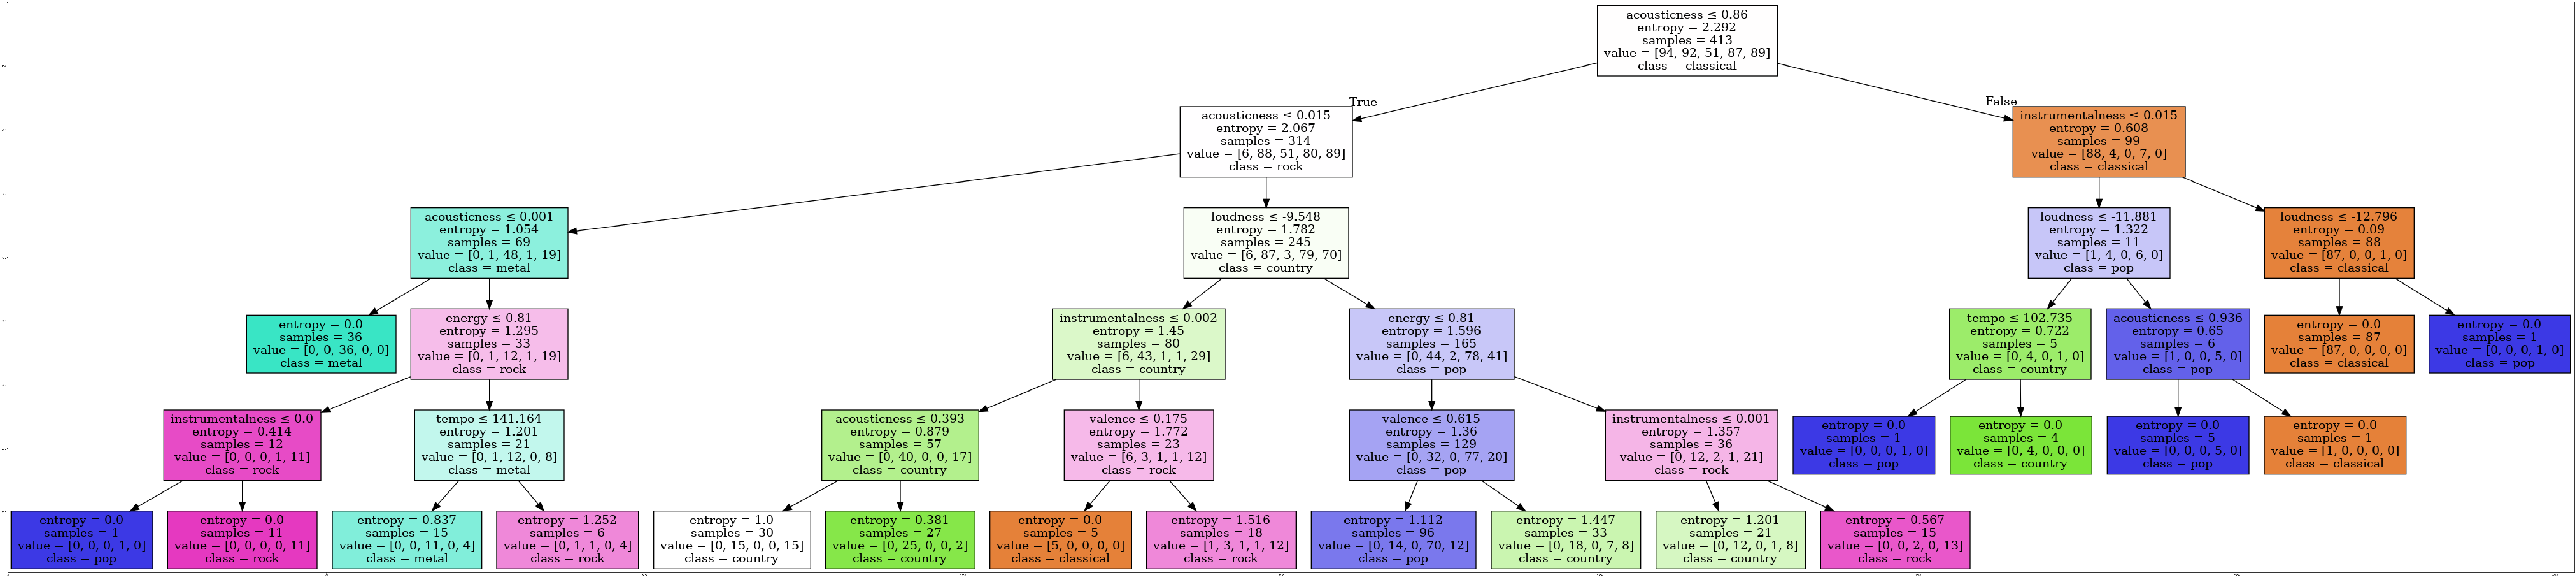

In [12]:
dot_data = StringIO()
filename = "genretree.png"
featureNames = df.columns[0:5]
targetNames = df["genre"].unique().tolist()
out=tree.export_graphviz(genreTree,feature_names=['acousticness','danceability','energy','instrumentalness','loudness','speechiness','valence','tempo'], out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 200))
plt.imshow(img,interpolation='nearest')

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rnd_clf = RandomForestClassifier(n_estimators=7, max_leaf_nodes=16, n_jobs=-1, random_state=1)
rnd_clf.fit(X_trainset, y_trainset)
ypred = rnd_clf.predict(X_testset)
print(accuracy_score(y_testset, ypred))

0.5869565217391305


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
ovr_clf = OneVsRestClassifier(LogisticRegression(max_iter=100, random_state=1))
ovr_clf.fit(X_trainset, y_trainset)
ypred = ovr_clf.predict(X_testset)
from sklearn.metrics import accuracy_score
confusion_matrix(y_testset, ypred)
print(accuracy_score(y_testset, ypred))

0.717391304347826


/home/binod/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/binod/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [15]:
import sklearn.metrics
from sklearn.metrics import classification_report
con=sklearn.metrics.classification_report(y_testset,ypred)
print(con)


              precision    recall  f1-score   support

   classical       1.00      1.00      1.00         6
     country       0.60      0.43      0.50         7
       metal       0.67      0.67      0.67         9
         pop       0.71      0.77      0.74        13
        rock       0.67      0.73      0.70        11

    accuracy                           0.72        46
   macro avg       0.73      0.72      0.72        46
weighted avg       0.71      0.72      0.71        46



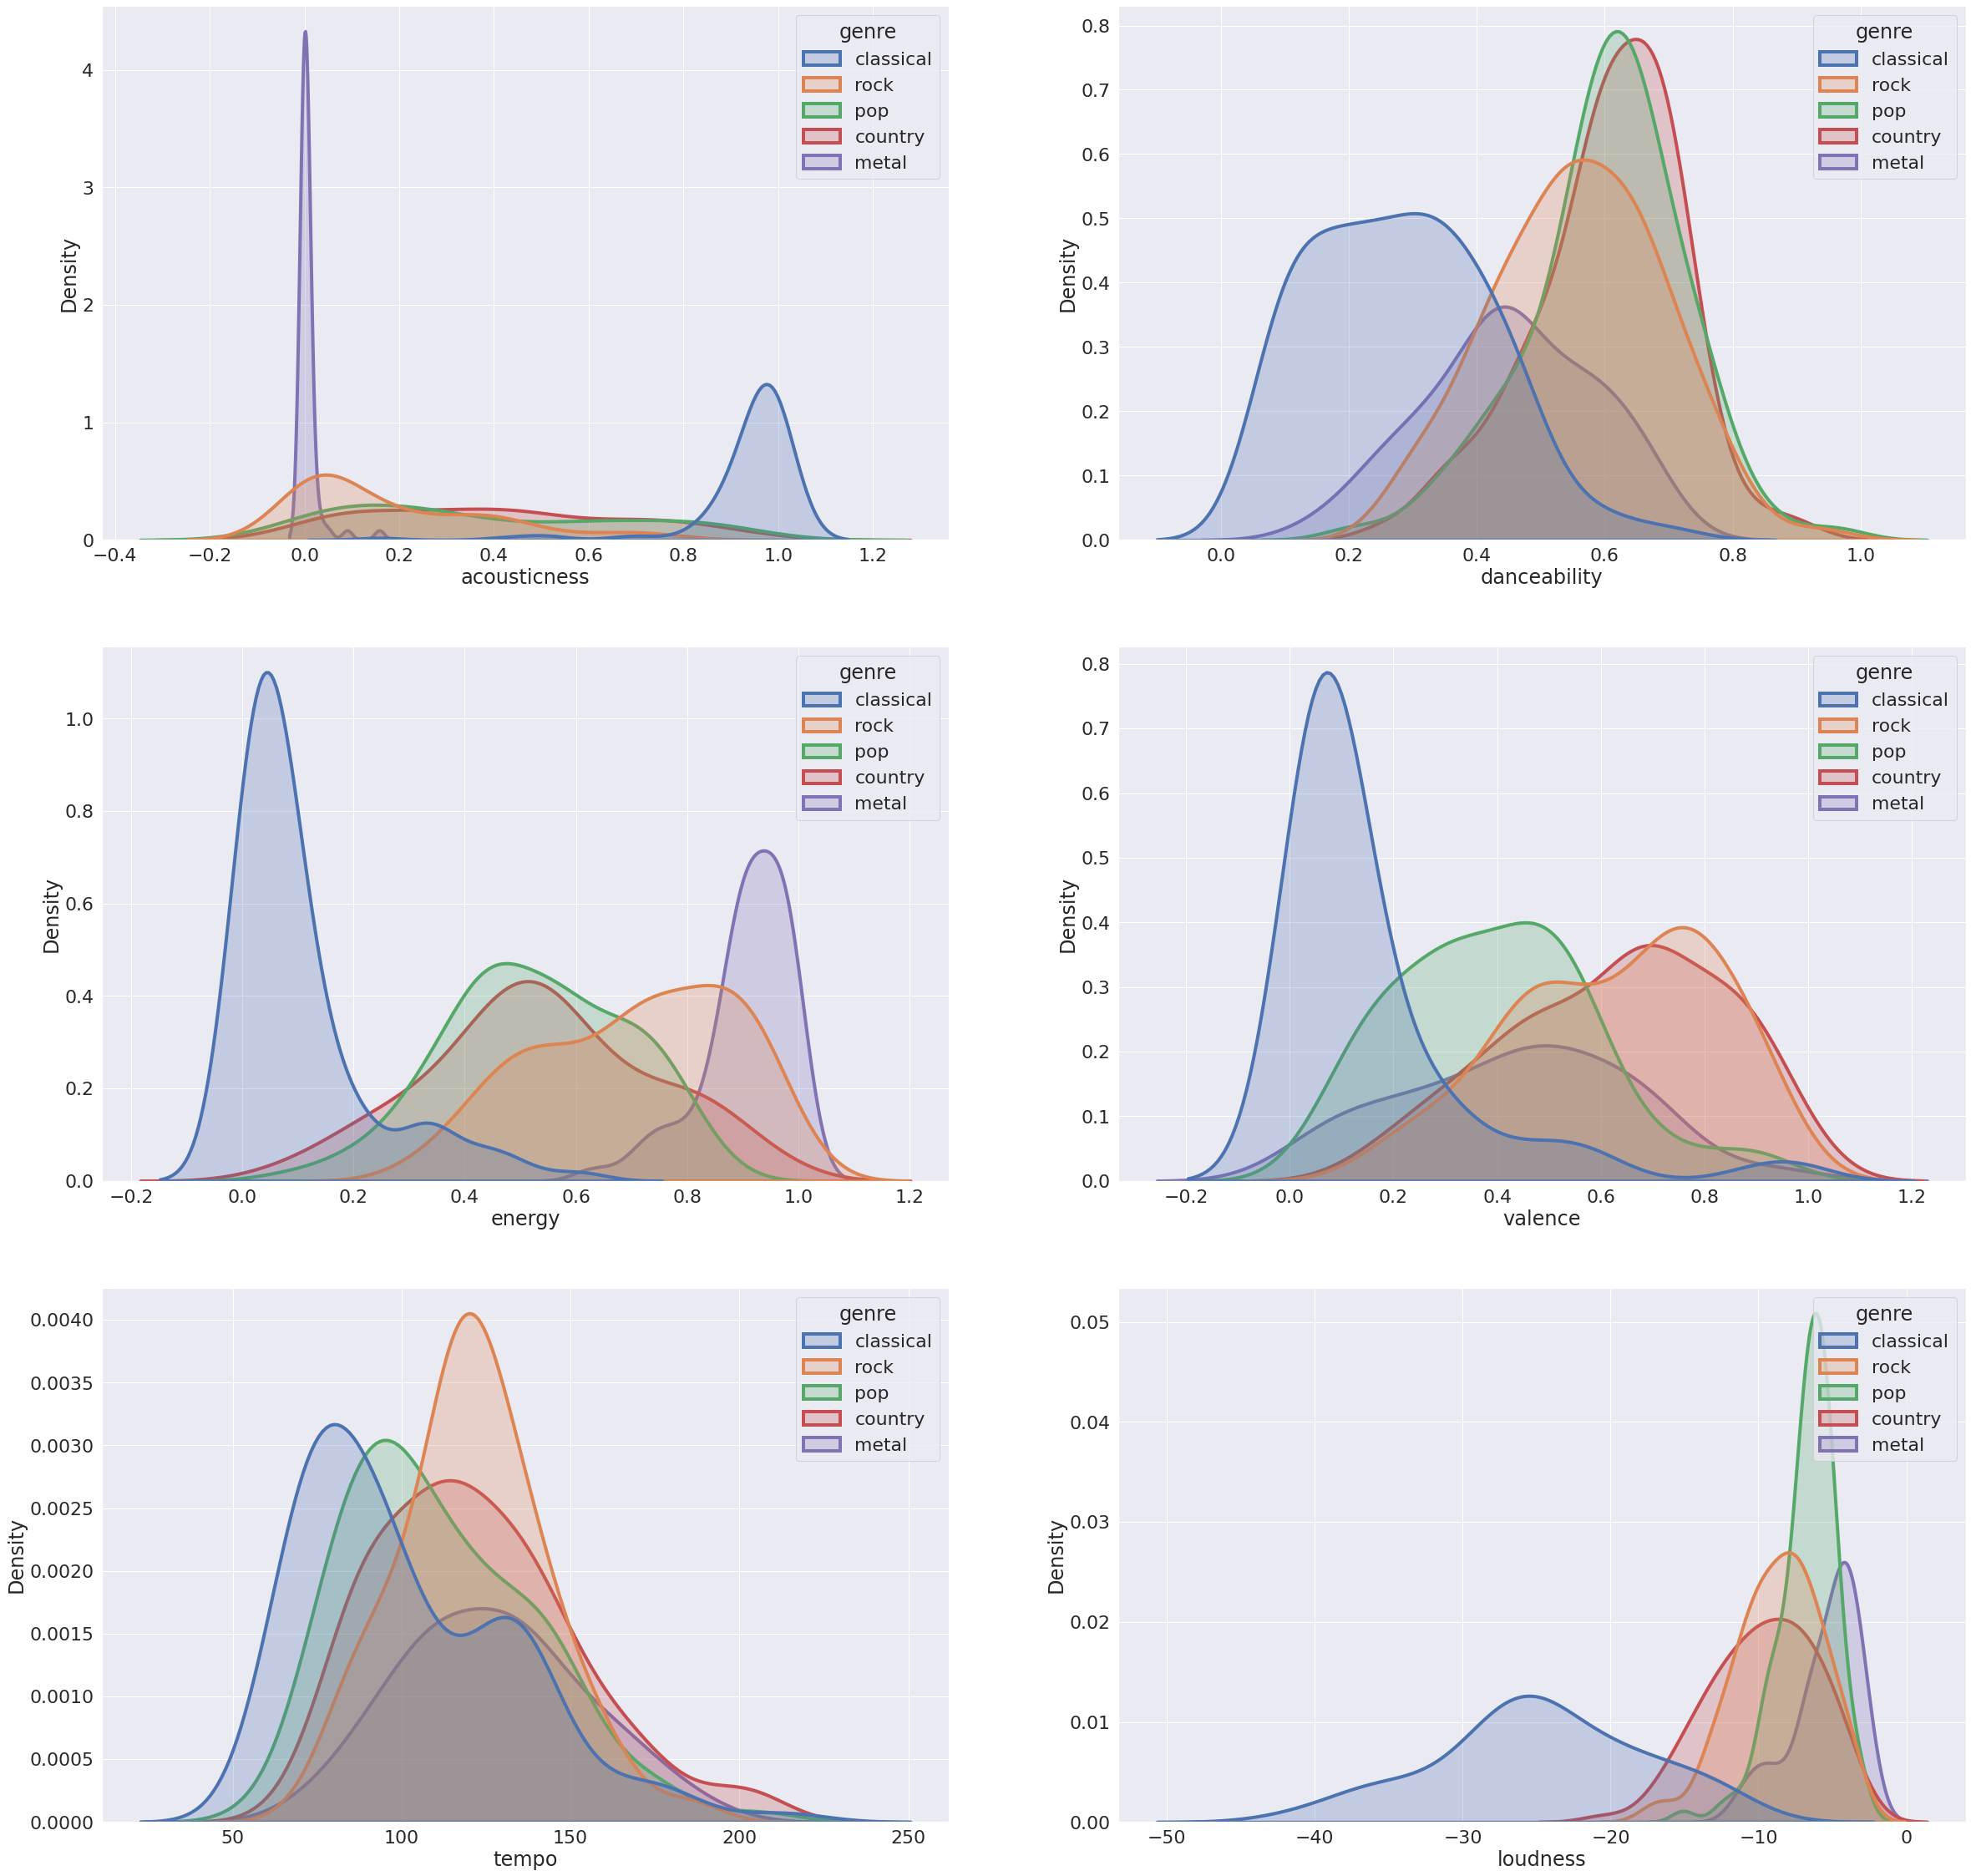

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=2)
#genre ==['classical','rock','pop']
sns.color_palette("cubehelix", as_cmap=True)
category=['acousticness','danceability','energy','valence','tempo','loudness']
fig, axs = plt.subplots(nrows=3, ncols=2,figsize=(40,40))
for i, var in enumerate(category):
    row = i//2
    pos = i % 2
    plot = sns.kdeplot(x=var, data=df,hue='genre' , ax=axs[row][pos],fill=True,linewidth=4)
plt.savefig('genretest.png')

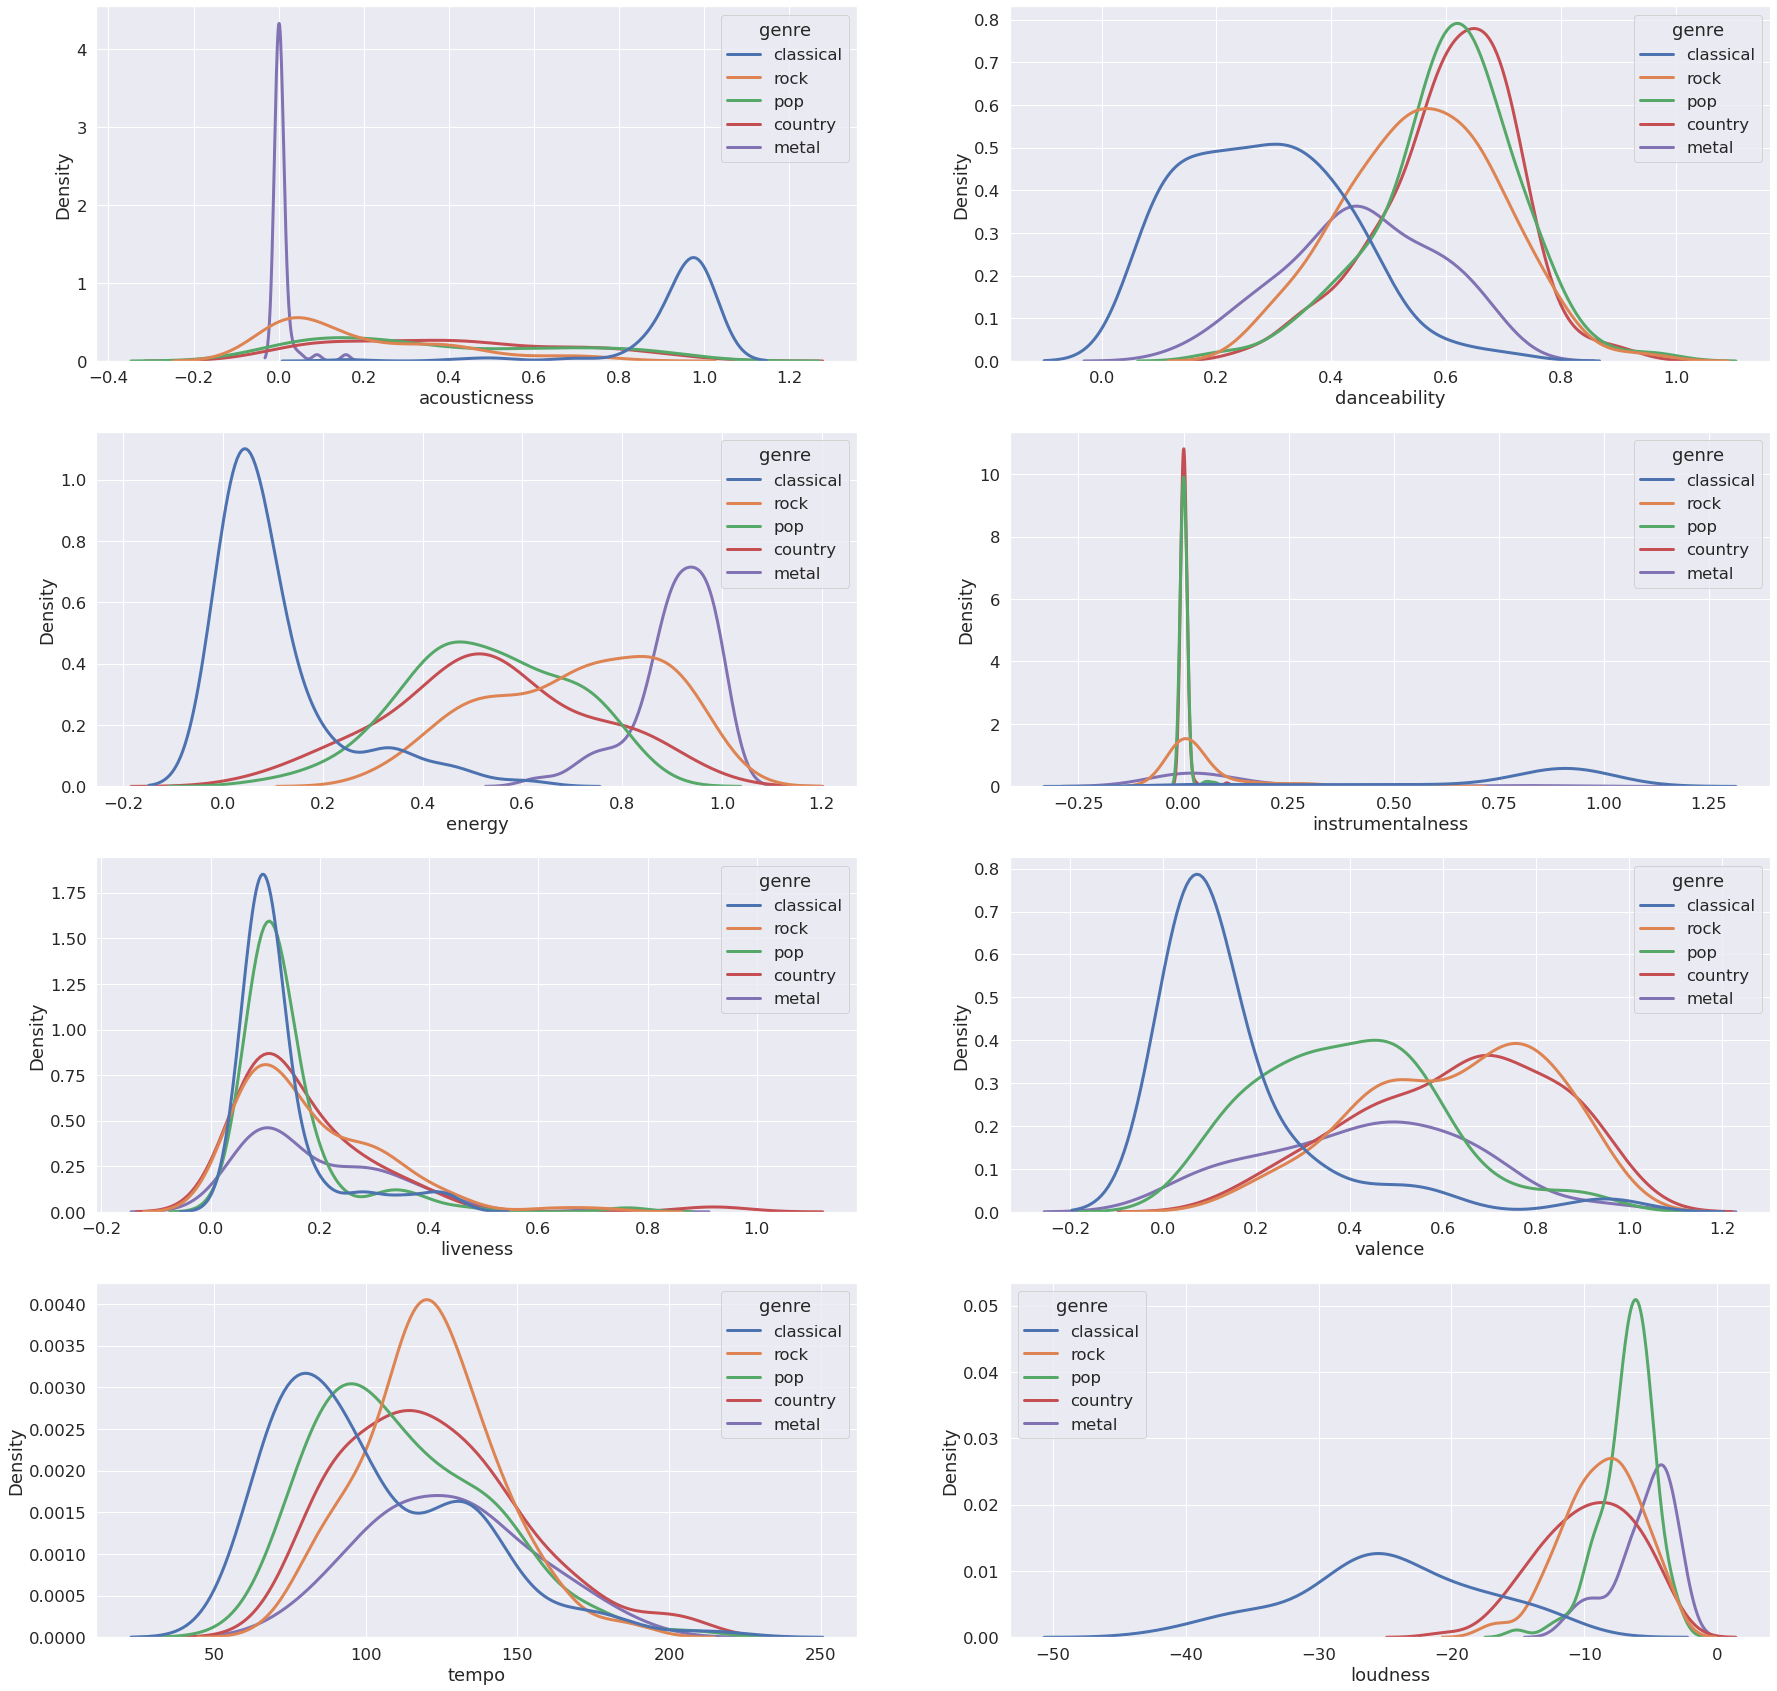

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
category=['acousticness','danceability','energy','instrumentalness','liveness','valence','tempo','loudness']
fig, axs = plt.subplots(nrows=4, ncols=2,figsize=(30,30))
for i, var in enumerate(category):
    row = i//2
    pos = i % 2
    plot = sns.kdeplot(x=var, data=df,hue='genre', ax=axs[row][pos], linewidth=3)